# Import Library

In [1]:
import cv2
import datetime
import numpy as np
import tensorflow as tf
keras = tf.keras

# Defining Functions

In [2]:
def blit(text,frame,color,position=(100, 100)):
    cv2.putText(frame,
                text,
                position,
                cv2.FONT_HERSHEY_SIMPLEX,
                2,
                color,
                4,
                cv2.LINE_4)

In [3]:
import os
os.chdir('drive/My Drive/PythonProject/Face Mask Detection')

# Loading NN Model

In [4]:
model = keras.models.load_model('face_mask_ai.h5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 86528)            

# Video Capture from Files

In [5]:
import matplotlib.pyplot as plt

In [8]:
input_video = 'video4.mp4'

Video files name : output-2020-11-05-04-06.avi
Video fps : 29.833162666307963
Video size : (1920, 1080)
Program is working. Please be patient...


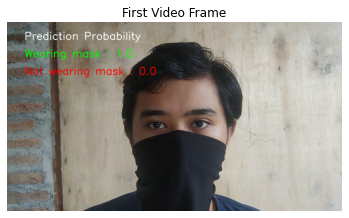

In [ ]:
# Video information
videoCapture = cv2.VideoCapture(input_video)
fps = videoCapture.get(cv2.CAP_PROP_FPS)

# If 720p video resolution is too heavy. Uncomment for alternative option
# size = (640,480)

size = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# Write video to .avi
today = str(datetime.datetime.today()).split(' ')
today_time = '-'.join(today[1].split(':')[:-1])

video_name = f'output-{today[0]}-{today_time}.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
videoWriter = cv2.VideoWriter(video_name,fourcc, fps, size)

print(f'Video files name : {video_name}')
print(f'Video fps : {fps}')
print(f'Video size : {size}')
print('Program is working. Please be patient...')

first_time = True
while True:
    res,frame = videoCapture.read()
    if res:
        img = cv2.resize(frame, (224,224), interpolation = cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        prediction = model.predict(np.expand_dims(img,axis=0))

        blit(f'Prediction Probability',frame,(255,255,255),(100,100))
        blit(f'Wearing mask : {prediction[0][0]}',frame,(0, 255, 0),(100,200))
        blit(f'Not wearing mask : {prediction[0][1]}',frame,(0, 0, 255),(100,300))

        if first_time:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.axis(False)
            plt.title('First Video Frame')
            plt.show()
            first_time = False
        
        # Write detected frame by frame
        videoWriter.write(frame)
    else:
        break

videoCapture.release()
videoWriter.release()
cv2.destroyAllWindows()

print(f'Finished. Video exported to {video_name}')